In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement 

The question we want to solve is:

**Which physiochemical characteristics of wine are the strongest predictors of wine quality?**

This is a predictive question.

## Dataset

In [75]:
# load dataset
wine_qual = pd.read_csv('../data/winequality-red.csv')

In [76]:
# glance the dataset
wine_qual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Variables description

- fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol: the percent alcohol content of the wine
- quality: output variable (based on sensory data, score between 0 and 10)

In [77]:
# check if the dataset has missing value
wine_qual.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
# check the data type of each variable
wine_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It looks like all variables are numeric variables and there is no missing value in the dataset.

In [79]:
cate_variables = []
num_variables = []
for x in wine_qual.columns:
#     print(x)
    if wine_qual[x].nunique() < 60:
        cate_variables.append(x)
    else:
        num_variables.append(x)
    
print("Categorical variables: ", cate_variables)
print("------------------------------")
print("Numeric variables: ", num_variables)

Categorical variables:  ['quality']
------------------------------
Numeric variables:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Let's visualize our target variable, wine quality.

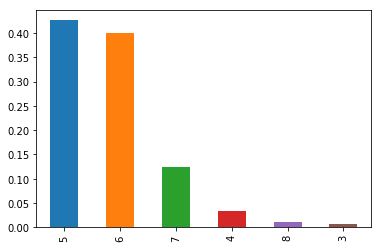

In [80]:
(wine_qual["quality"].value_counts()/len(wine_qual)).plot.bar();

Over 40% of the wine have the quality of 5 and nearly 40% of the wine have the quality of 6.

Treate a wine as good if its quality is greater than 5, otherwise mark bad.

In [81]:
# cut wine as good and bad by giving bins for the quality
# 0 = "bad" and 1 = "good", ease of use in machine learning 
bins = (2, 5, 8)
group_names = [0, 1]
wine_qual['quality'] = pd.cut(wine_qual['quality'], bins = bins, labels = group_names)

In [82]:
wine_qual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


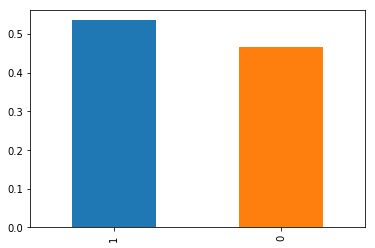

In [83]:
(wine_qual["quality"].value_counts()/len(wine_qual)).plot.bar();

## Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [125]:
X = wine_qual.drop("quality", axis = 1)
y = wine_qual["quality"].apply(lambda x:int(x))

#  split your data into train:validation sets by 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [126]:
depth_selection = []
for depth in range(1,25):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_test, y_test, cv = 5)
    cv_score = score.mean()
    depth_selection.append((depth,cv_score))

In [127]:
from operator import itemgetter

best_depth = max(depth_selection, key=itemgetter(1))[0] 
print("The best depth is: ", best_depth)

The best depth is:  2


In [131]:
model_best = DecisionTreeClassifier(max_depth = best_depth)
model_best.fit(X_train, y_train)
predictions = model_best.predict(X_test)
pred_dict = y_test.copy()
# pred_dict['prediction'] = predictions
pred_dict = pred_dict.to_frame()
pred_dict['prediction'] = predictions
pred_dict

,quality,prediction
688,0,0
961,0,0
726,1,1
537,1,1
1544,1,1
1251,0,0
1096,1,1
1547,0,1
1446,0,0
142,1,1


320